# Day 2 task - NYC School Directory

## 0. Importing pandas

In [46]:
import pandas as pd

## 1. Loading required Dataset
### Reading data from a CSV file

In [47]:
df = pd.read_csv("/Users/heikereichert/Downloads/high-school-directory.csv")

df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


# 2. Cleaning Column Names

- import regualar expression

In [48]:
import re

In [49]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = [re.sub(r'[^A-Za-z0-9_]+', '', col) for col in df.columns] # Remove special characters
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


## 3. Create a filtered df

In [50]:
filtered_df = df[df["borough"].str.contains("Brooklyn", case=False, na=False)]
filtered_df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


## 4.a How many total schools are in Brooklyn? 

In [51]:
unique_school_count = filtered_df["dbn"].nunique()
print(unique_school_count)

121


## Answer: 121

## 4b. How many schools in Brooklyn offer Grade 9 entry? 

In [52]:
grade9_schools = filtered_df[
    (filtered_df["grade_span_min"] <= 9) &
    (filtered_df["grade_span_max"] >= 9)
]

# Count unique schools  
unique_school_count = grade9_schools["dbn"].nunique()
print(unique_school_count)

print(grade9_schools[["dbn", "grade_span_min", "grade_span_max"]].head(10))

121
       dbn  grade_span_min  grade_span_max
1   21K559             9.0              12
2   16K393             9.0              12
7   17K122             9.0              12
10  23K644             6.0              12
12  15K462             9.0              12
21  18K576             9.0              12
25  17K546             9.0              12
29  19K409             6.0              12
32  14K632             9.0              12
39  20K505             9.0              12


## Answer: 121

## 5. Group and summarize

## 5a. Count of schools per borough 

In [53]:
school_counts = df.groupby('borough')['dbn'].nunique()
print(school_counts)

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64


## 5b. Average number of students per borough

In [54]:
school_average = df.groupby('borough')['total_students'].mean()
print(school_average)

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64


## 5c. Summary of grade_span_max grouped by borough (use the method that provides you with basic statistics about that column)

In [55]:
school_stat_grade = df.groupby('borough')['grade_span_max'].describe()
print(school_stat_grade)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


## 6. Create visualization
- Bar chart: Number of schools per borough

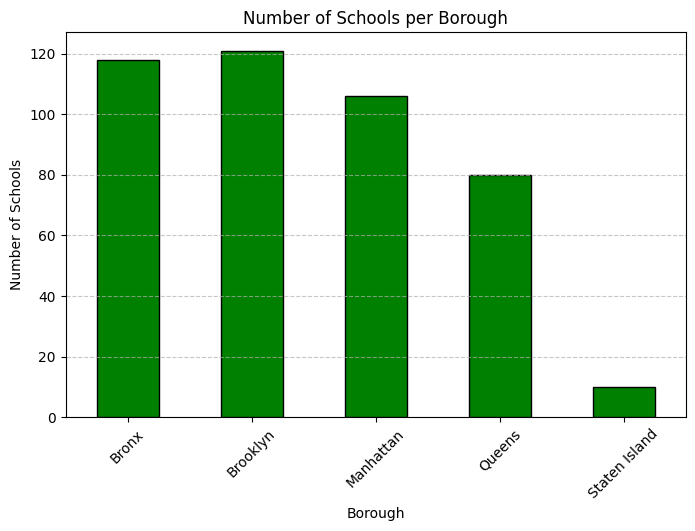

In [56]:

import matplotlib.pyplot as plt  # import matplotlib for visualization

school_counts = df.groupby('borough')['dbn'].nunique()

# Create bar chart
plt.figure(figsize=(8,5))
school_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 7. Insights
- all schools in Brooklyn offer grade 9 entry
- Staten Island has the lowest number of schools, but the highest average of students
- Brooklyn has the highest number of schools